In [1]:
# Import libraries for handling data

import numpy as np

import copy

import pandas as pd

import seaborn as sns

# import cufflinks as cf

%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc,f1_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.svm import SVC

In [2]:
data = pd.read_csv("profitable.csv")
df = data

In [3]:
df.head()

,industry_type,total_liabilities/total_assets,working_capital/total_assets,current_assets/short_term_liabilities,Distance_from_the_airport,retained_earnings/total_assets,Employee_strength,MNC,sales/total_assets,equity/total_assets,Location,distances_from_water_source,powered_by_green_energy,(gross_profit + interest)/total_assets,(total_liabilities * 365)/(gross_profit + depreciation),target
0,software,0.37951,0.39641,2.0472,0,0.38825,0,0,1.1389,0.50494,0,0,1.0,0.249760,497.42,0
1,textile,0.49988,0.47225,1.9447,0,0.00000,1,0,1.6996,0.49788,0,0,1.0,0.258340,677.96,0
2,hardware,0.69592,0.26713,1.5548,0,0.00000,0,0,1.3090,0.30408,0,0,1.0,0.309060,794.16,0
3,software,0.30734,0.45879,2.4928,0,0.14988,0,0,1.0571,0.57353,0,0,1.0,0.092704,917.01,0
4,software,0.61323,0.22960,1.4063,1,0.18732,0,0,1.1559,0.38677,0,1,1.0,0.187320,1133.20,1


In [4]:
df.tail()

,industry_type,total_liabilities/total_assets,working_capital/total_assets,current_assets/short_term_liabilities,Distance_from_the_airport,retained_earnings/total_assets,Employee_strength,MNC,sales/total_assets,equity/total_assets,Location,distances_from_water_source,powered_by_green_energy,(gross_profit + interest)/total_assets,(total_liabilities * 365)/(gross_profit + depreciation),target
43256,textile,0.45677,0.022655,1.06480,1,0.21946,1,1,1.15960,0.49894,1,1,NaN,0.27496,557.51,1
43257,hardware,0.46223,0.342010,1.86290,1,0.00000,0,1,2.37770,0.53776,1,1,NaN,0.19507,864.87,1
43258,hardware,2.77900,-1.866800,0.32760,1,-0.54284,0,1,0.69234,-1.78720,1,1,NaN,-0.54284,-2110.10,1
43259,software,0.71195,0.026904,1.04660,1,0.00000,0,1,2.02520,0.28805,1,1,NaN,-0.26014,-1362.40,1
43260,software,0.89531,-0.189290,0.78858,1,0.00000,0,1,3.22340,0.10420,1,1,NaN,-0.37463,-934.09,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43261 entries, 0 to 43260
Data columns (total 16 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   industry_type                                            43261 non-null  object 
 1   total_liabilities/total_assets                           43254 non-null  float64
 2   working_capital/total_assets                             43254 non-null  float64
 3   current_assets/short_term_liabilities                    43128 non-null  float64
 4   Distance_from_the_airport                                43261 non-null  int64  
 5   retained_earnings/total_assets                           43249 non-null  float64
 6   Employee_strength                                        43261 non-null  int64  
 7   MNC                                                      43261 non-null  int64  
 8   sales/total_assets        

In [6]:
df.shape

(43261, 16)

In [7]:
#DATA WRANGLING

print("Rows     : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures : \n", df.columns.tolist())
print("\nMissing values :  ", df.isnull().sum())
print("\nUnique values :  \n", df.nunique())

Rows     :  43261
Columns  :  16

Features : 
 ['industry_type', 'total_liabilities/total_assets', 'working_capital/total_assets', 'current_assets/short_term_liabilities', 'Distance_from_the_airport', 'retained_earnings/total_assets', 'Employee_strength', 'MNC', 'sales/total_assets', 'equity/total_assets', 'Location', 'distances_from_water_source', 'powered_by_green_energy', '(gross_profit + interest)/total_assets', '(total_liabilities * 365)/(gross_profit + depreciation)', 'target']

Missing values :   industry_type                                                 0
total_liabilities/total_assets                                7
working_capital/total_assets                                  7
current_assets/short_term_liabilities                       133
Distance_from_the_airport                                     0
retained_earnings/total_assets                               12
Employee_strength                                             0
MNC                                        

In [8]:
# HANDLING NULL VALUES

print("\nMissing values : ", df.isnull().sum())
df.info()


Missing values :  industry_type                                                 0
total_liabilities/total_assets                                7
working_capital/total_assets                                  7
current_assets/short_term_liabilities                       133
Distance_from_the_airport                                     0
retained_earnings/total_assets                               12
Employee_strength                                             0
MNC                                                           0
sales/total_assets                                            9
equity/total_assets                                           7
Location                                                      0
distances_from_water_source                                   0
powered_by_green_energy                                    2073
(gross_profit + interest)/total_assets                        6
(total_liabilities * 365)/(gross_profit + depreciation)      36
target               

In [9]:
#newdf = copy.copy(df)

In [10]:
df = df.dropna(axis = 0)

In [11]:
cat_cols = ['industry_type','Distance_from_the_airport','Employee_strength','MNC','Location','distances_from_water_source','powered_by_green_energy','target']
num_cols = ['total_liabilities/total_assets','working_capital/total_assets','current_assets/short_term_liabilities','retained_earnings/total_assets','sales/total_assets','equity/total_assets','(gross_profit + interest)/total_assets','(total_liabilities * 365)/(gross_profit + depreciation)']

In [12]:
df[cat_cols] = df[cat_cols].astype('category')

/tmp/ipykernel_3113/279378677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].astype('category')


In [13]:
df.dtypes

industry_type                                              category
total_liabilities/total_assets                              float64
working_capital/total_assets                                float64
current_assets/short_term_liabilities                       float64
Distance_from_the_airport                                  category
retained_earnings/total_assets                              float64
Employee_strength                                          category
MNC                                                        category
sales/total_assets                                          float64
equity/total_assets                                         float64
Location                                                   category
distances_from_water_source                                category
powered_by_green_energy                                    category
(gross_profit + interest)/total_assets                      float64
(total_liabilities * 365)/(gross_profit + deprec

In [14]:
# Check for null values
df.isna().sum()

industry_type                                              0
total_liabilities/total_assets                             0
working_capital/total_assets                               0
current_assets/short_term_liabilities                      0
Distance_from_the_airport                                  0
retained_earnings/total_assets                             0
Employee_strength                                          0
MNC                                                        0
sales/total_assets                                         0
equity/total_assets                                        0
Location                                                   0
distances_from_water_source                                0
powered_by_green_energy                                    0
(gross_profit + interest)/total_assets                     0
(total_liabilities * 365)/(gross_profit + depreciation)    0
target                                                     0
dtype: int64

In [15]:
df.target.value_counts()

0    28874
1    12177
Name: target, dtype: int64

In [16]:
data.target.value_counts(normalize=True)*100

0    71.087122
1    28.912878
Name: target, dtype: float64

In [17]:
df.head()

,industry_type,total_liabilities/total_assets,working_capital/total_assets,current_assets/short_term_liabilities,Distance_from_the_airport,retained_earnings/total_assets,Employee_strength,MNC,sales/total_assets,equity/total_assets,Location,distances_from_water_source,powered_by_green_energy,(gross_profit + interest)/total_assets,(total_liabilities * 365)/(gross_profit + depreciation),target
0,software,0.37951,0.39641,2.0472,0,0.38825,0,0,1.1389,0.50494,0,0,1.0,0.249760,497.42,0
1,textile,0.49988,0.47225,1.9447,0,0.00000,1,0,1.6996,0.49788,0,0,1.0,0.258340,677.96,0
2,hardware,0.69592,0.26713,1.5548,0,0.00000,0,0,1.3090,0.30408,0,0,1.0,0.309060,794.16,0
3,software,0.30734,0.45879,2.4928,0,0.14988,0,0,1.0571,0.57353,0,0,1.0,0.092704,917.01,0
4,software,0.61323,0.22960,1.4063,1,0.18732,0,0,1.1559,0.38677,0,1,1.0,0.187320,1133.20,1


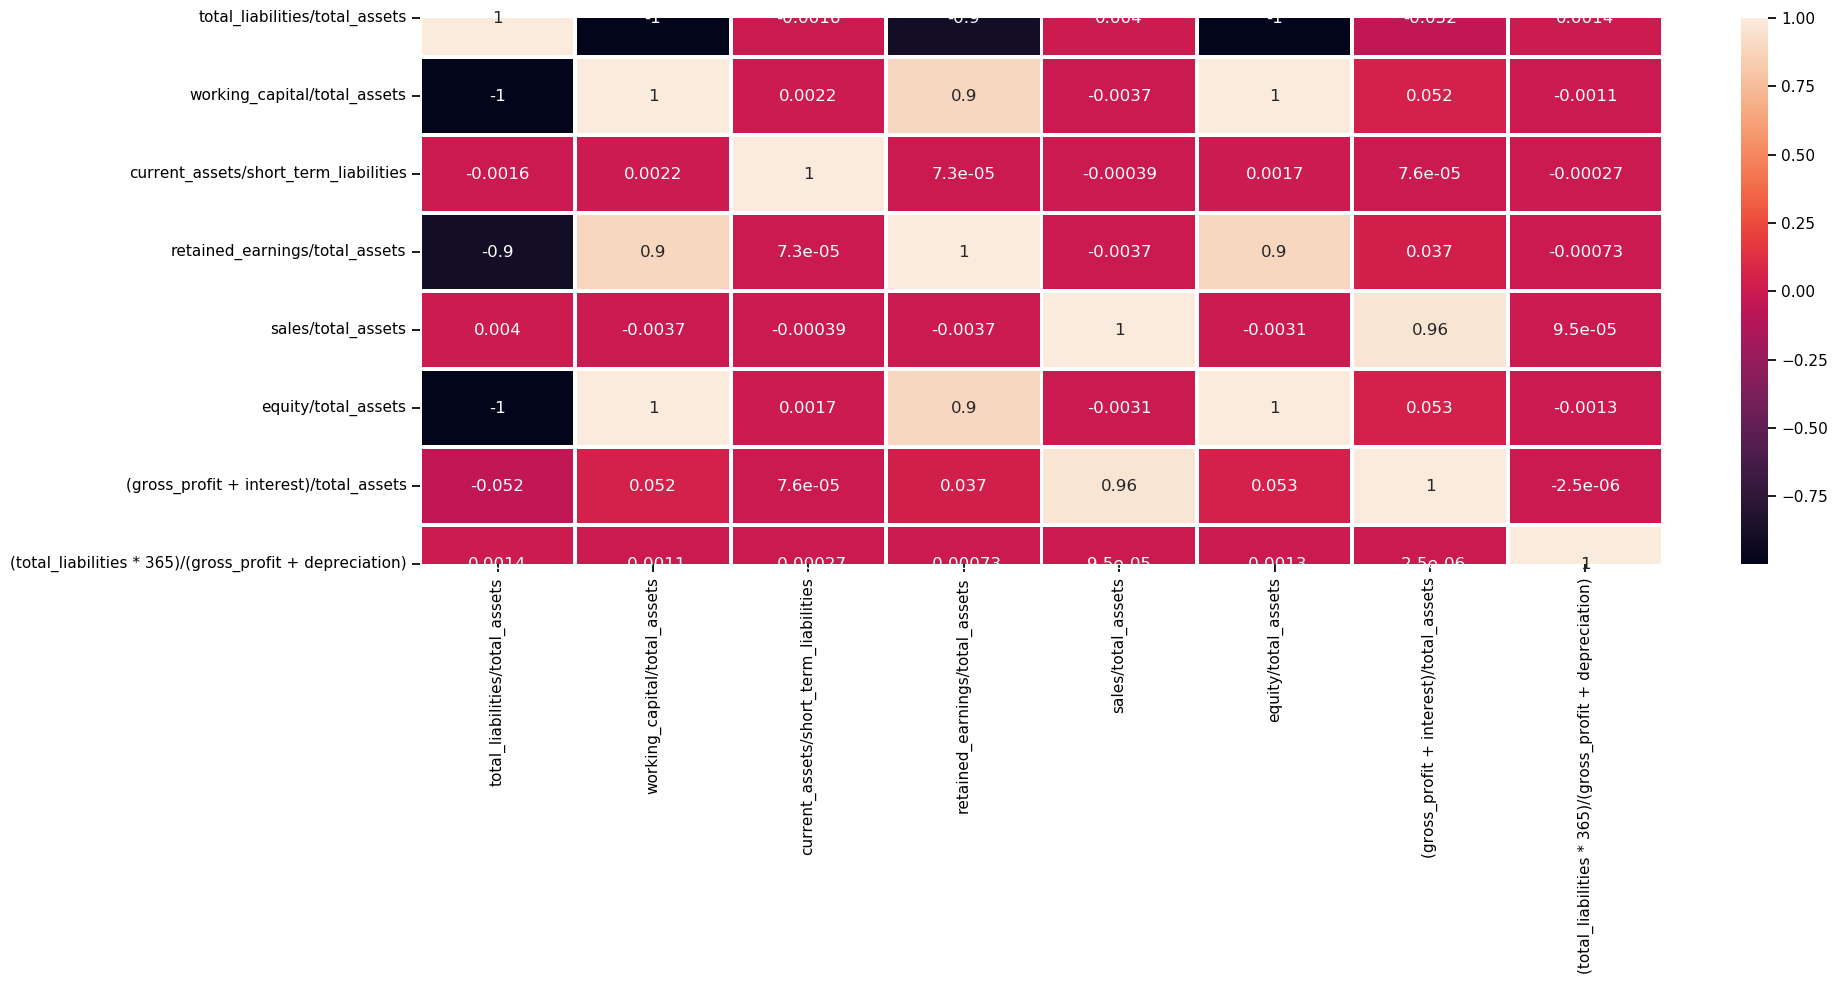

In [18]:
# Checking the corelation using heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.set_context('notebook',font_scale = 1)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [19]:
df.describe(include = 'all')

,industry_type,total_liabilities/total_assets,working_capital/total_assets,current_assets/short_term_liabilities,Distance_from_the_airport,retained_earnings/total_assets,Employee_strength,MNC,sales/total_assets,equity/total_assets,Location,distances_from_water_source,powered_by_green_energy,(gross_profit + interest)/total_assets,(total_liabilities * 365)/(gross_profit + depreciation),target
count,41051,41051.000000,41051.000000,41051.000000,41051.0,41051.000000,41051.0,41051.0,41051.000000,41051.000000,41051.0,41051.0,41051.0,41051.000000,4.105100e+04,41051.0
unique,3,NaN,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,2.0
top,textile,NaN,NaN,NaN,0.0,NaN,0.0,1.0,NaN,NaN,1.0,0.0,1.0,NaN,NaN,0.0
freq,17073,NaN,NaN,NaN,21053.0,NaN,23978.0,26908.0,NaN,NaN,21711.0,23789.0,29519.0,NaN,NaN,28874.0
mean,NaN,0.601638,0.111381,6.293652,NaN,-0.063521,NaN,NaN,2.067226,0.382246,NaN,NaN,NaN,0.089695,1.921709e+03,NaN
std,NaN,5.587719,5.574769,301.390869,NaN,6.290870,NaN,NaN,49.042325,5.598854,NaN,NaN,NaN,3.288427,9.852609e+04,NaN
min,NaN,0.000000,-479.960000,-0.045319,NaN,-508.410000,NaN,NaN,-0.184340,-479.910000,NaN,NaN,NaN,-75.331000,-9.632400e+06,NaN
25%,NaN,0.269665,0.022393,1.052000,NaN,0.000000,NaN,NaN,1.019700,0.295920,NaN,NaN,NaN,0.006243,2.276600e+02,NaN
50%,NaN,0.472100,0.197110,1.573600,NaN,0.000000,NaN,NaN,1.202100,0.506050,NaN,NaN,NaN,0.060644,8.481500e+02,NaN
75%,NaN,0.688505,0.403140,2.793550,NaN,0.091406,NaN,NaN,2.076250,0.708260,NaN,NaN,NaN,0.152240,2.219450e+03,NaN


In [20]:
df.isnull().sum()

industry_type                                              0
total_liabilities/total_assets                             0
working_capital/total_assets                               0
current_assets/short_term_liabilities                      0
Distance_from_the_airport                                  0
retained_earnings/total_assets                             0
Employee_strength                                          0
MNC                                                        0
sales/total_assets                                         0
equity/total_assets                                        0
Location                                                   0
distances_from_water_source                                0
powered_by_green_energy                                    0
(gross_profit + interest)/total_assets                     0
(total_liabilities * 365)/(gross_profit + depreciation)    0
target                                                     0
dtype: int64

/tmp/ipykernel_3113/8504531.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


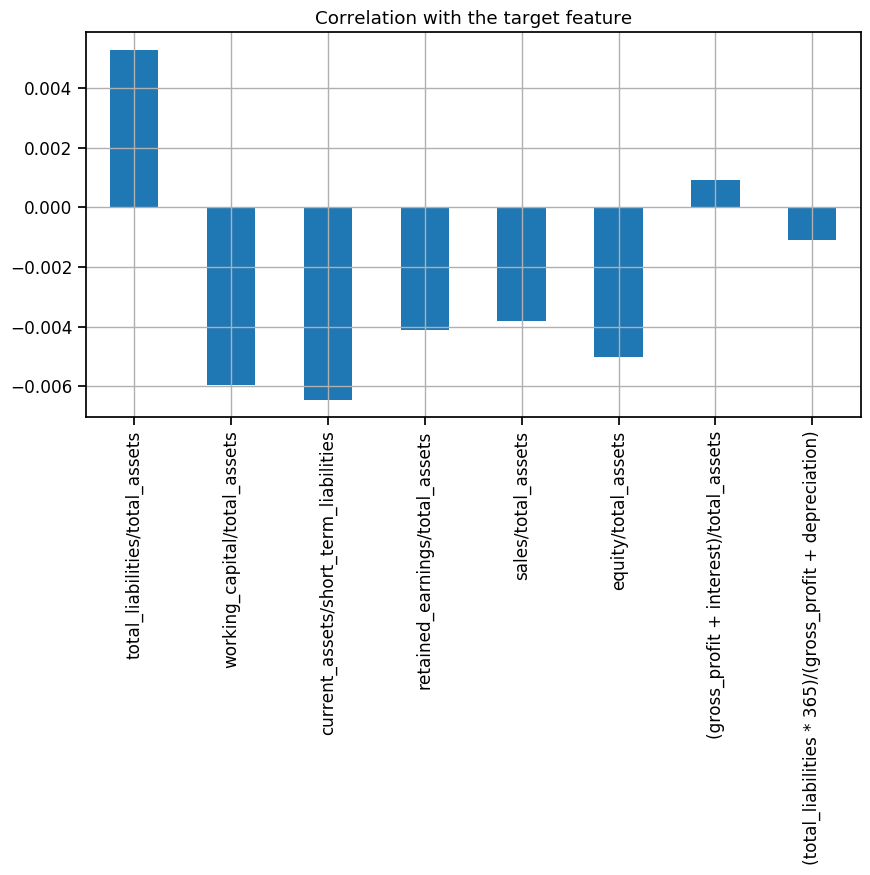

In [21]:
# check the correlation of the target variable.

sns.set_context('notebook',font_scale = 1.1)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(10, 5), 
                                                        title="Correlation with the target feature")
plt.tight_layout()

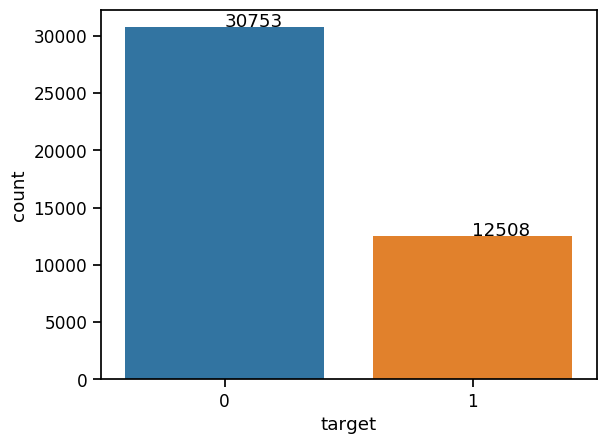

In [22]:
y_count=sns.countplot(x='target',data=data)        

for p in y_count.patches:
    height = p.get_height()
    y_count.text(p.get_x()+p.get_width()/2, height + 10, height)

In [23]:
len(df.columns)

16

In [24]:
num_cols = df.select_dtypes(include=['int64','float64','Int64']).columns

In [25]:
cat_cols = df.select_dtypes(include=['category']).columns
cat_cols = cat_cols.drop('target')

In [26]:
def PlothistCharts(inpData, colsToPlot):
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,40))
    fig.suptitle('HISTOGRAM CHART(NUMERICAL)')
    fig.subplots_adjust(hspace = 0.5,wspace=0.8)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='hist',ax=subPlot[plotNumber]).set(ylabel=None)

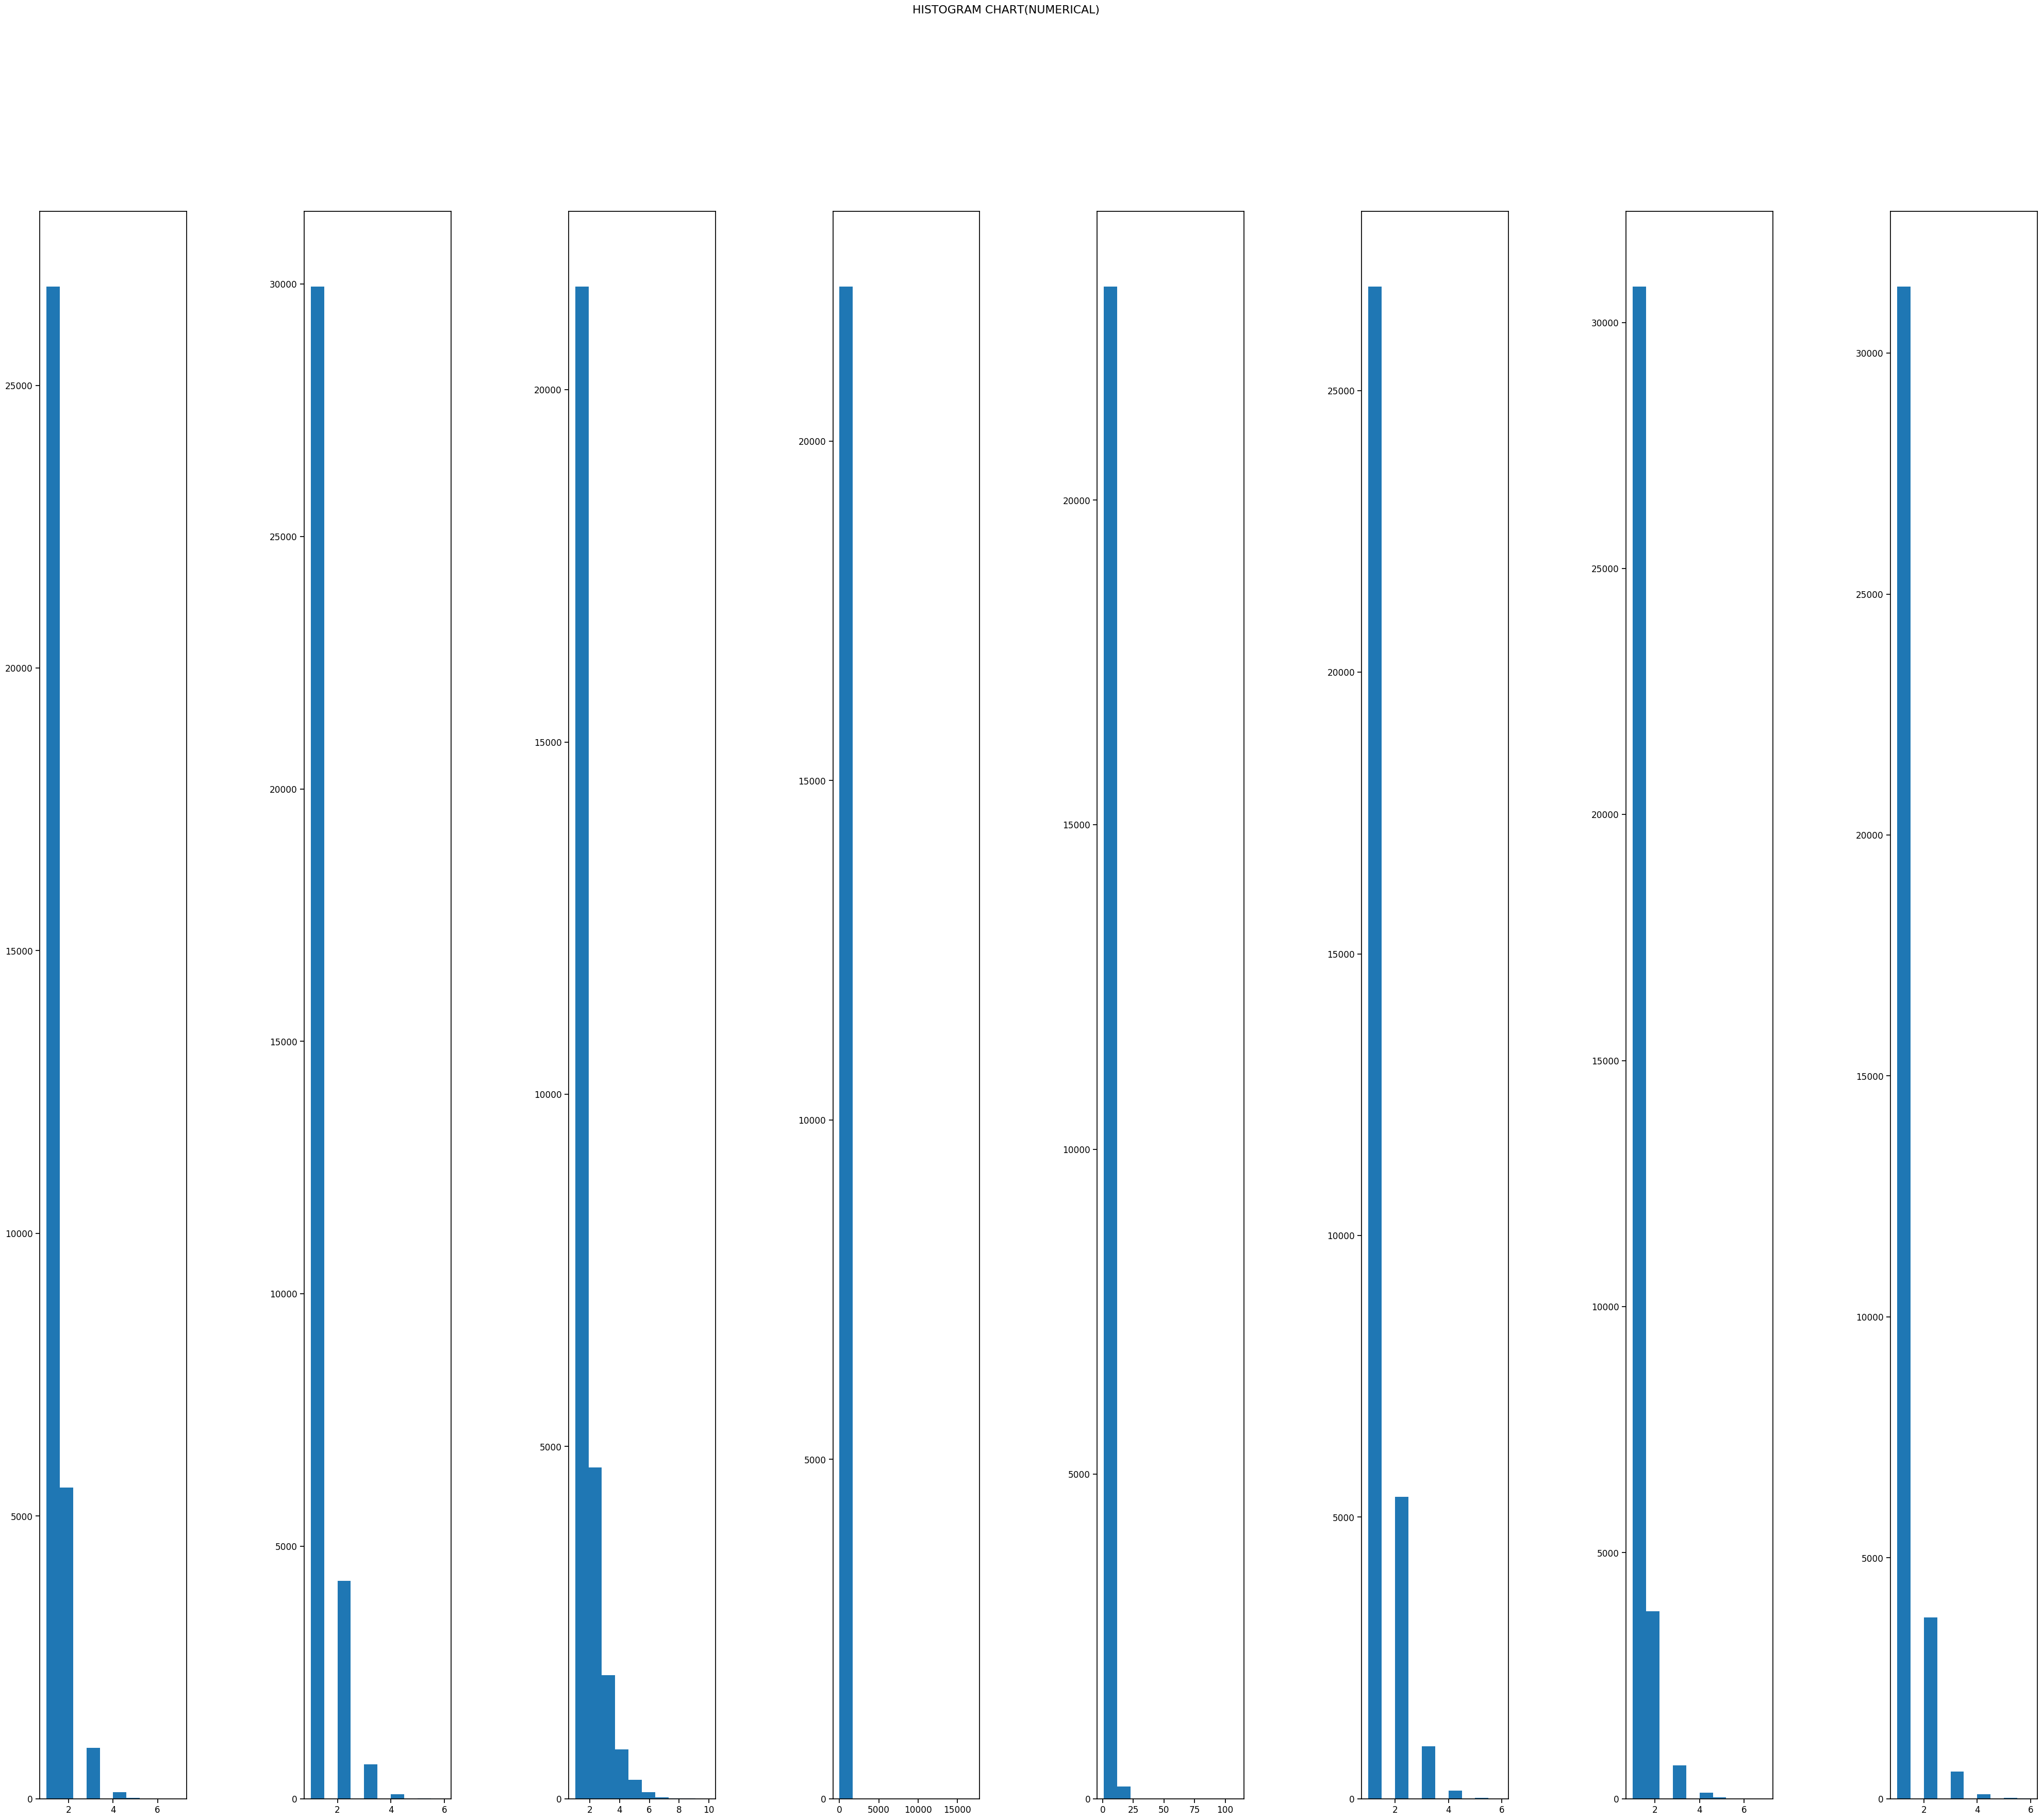

In [27]:
PlothistCharts(inpData=df, colsToPlot=num_cols)

In [28]:
def PlotBarCharts(inpData, colsToPlot):
    
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,40))
    fig.suptitle('BAR CHART(CATEGORICAL)')
    fig.subplots_adjust(hspace = 5.0,wspace=0.5)

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

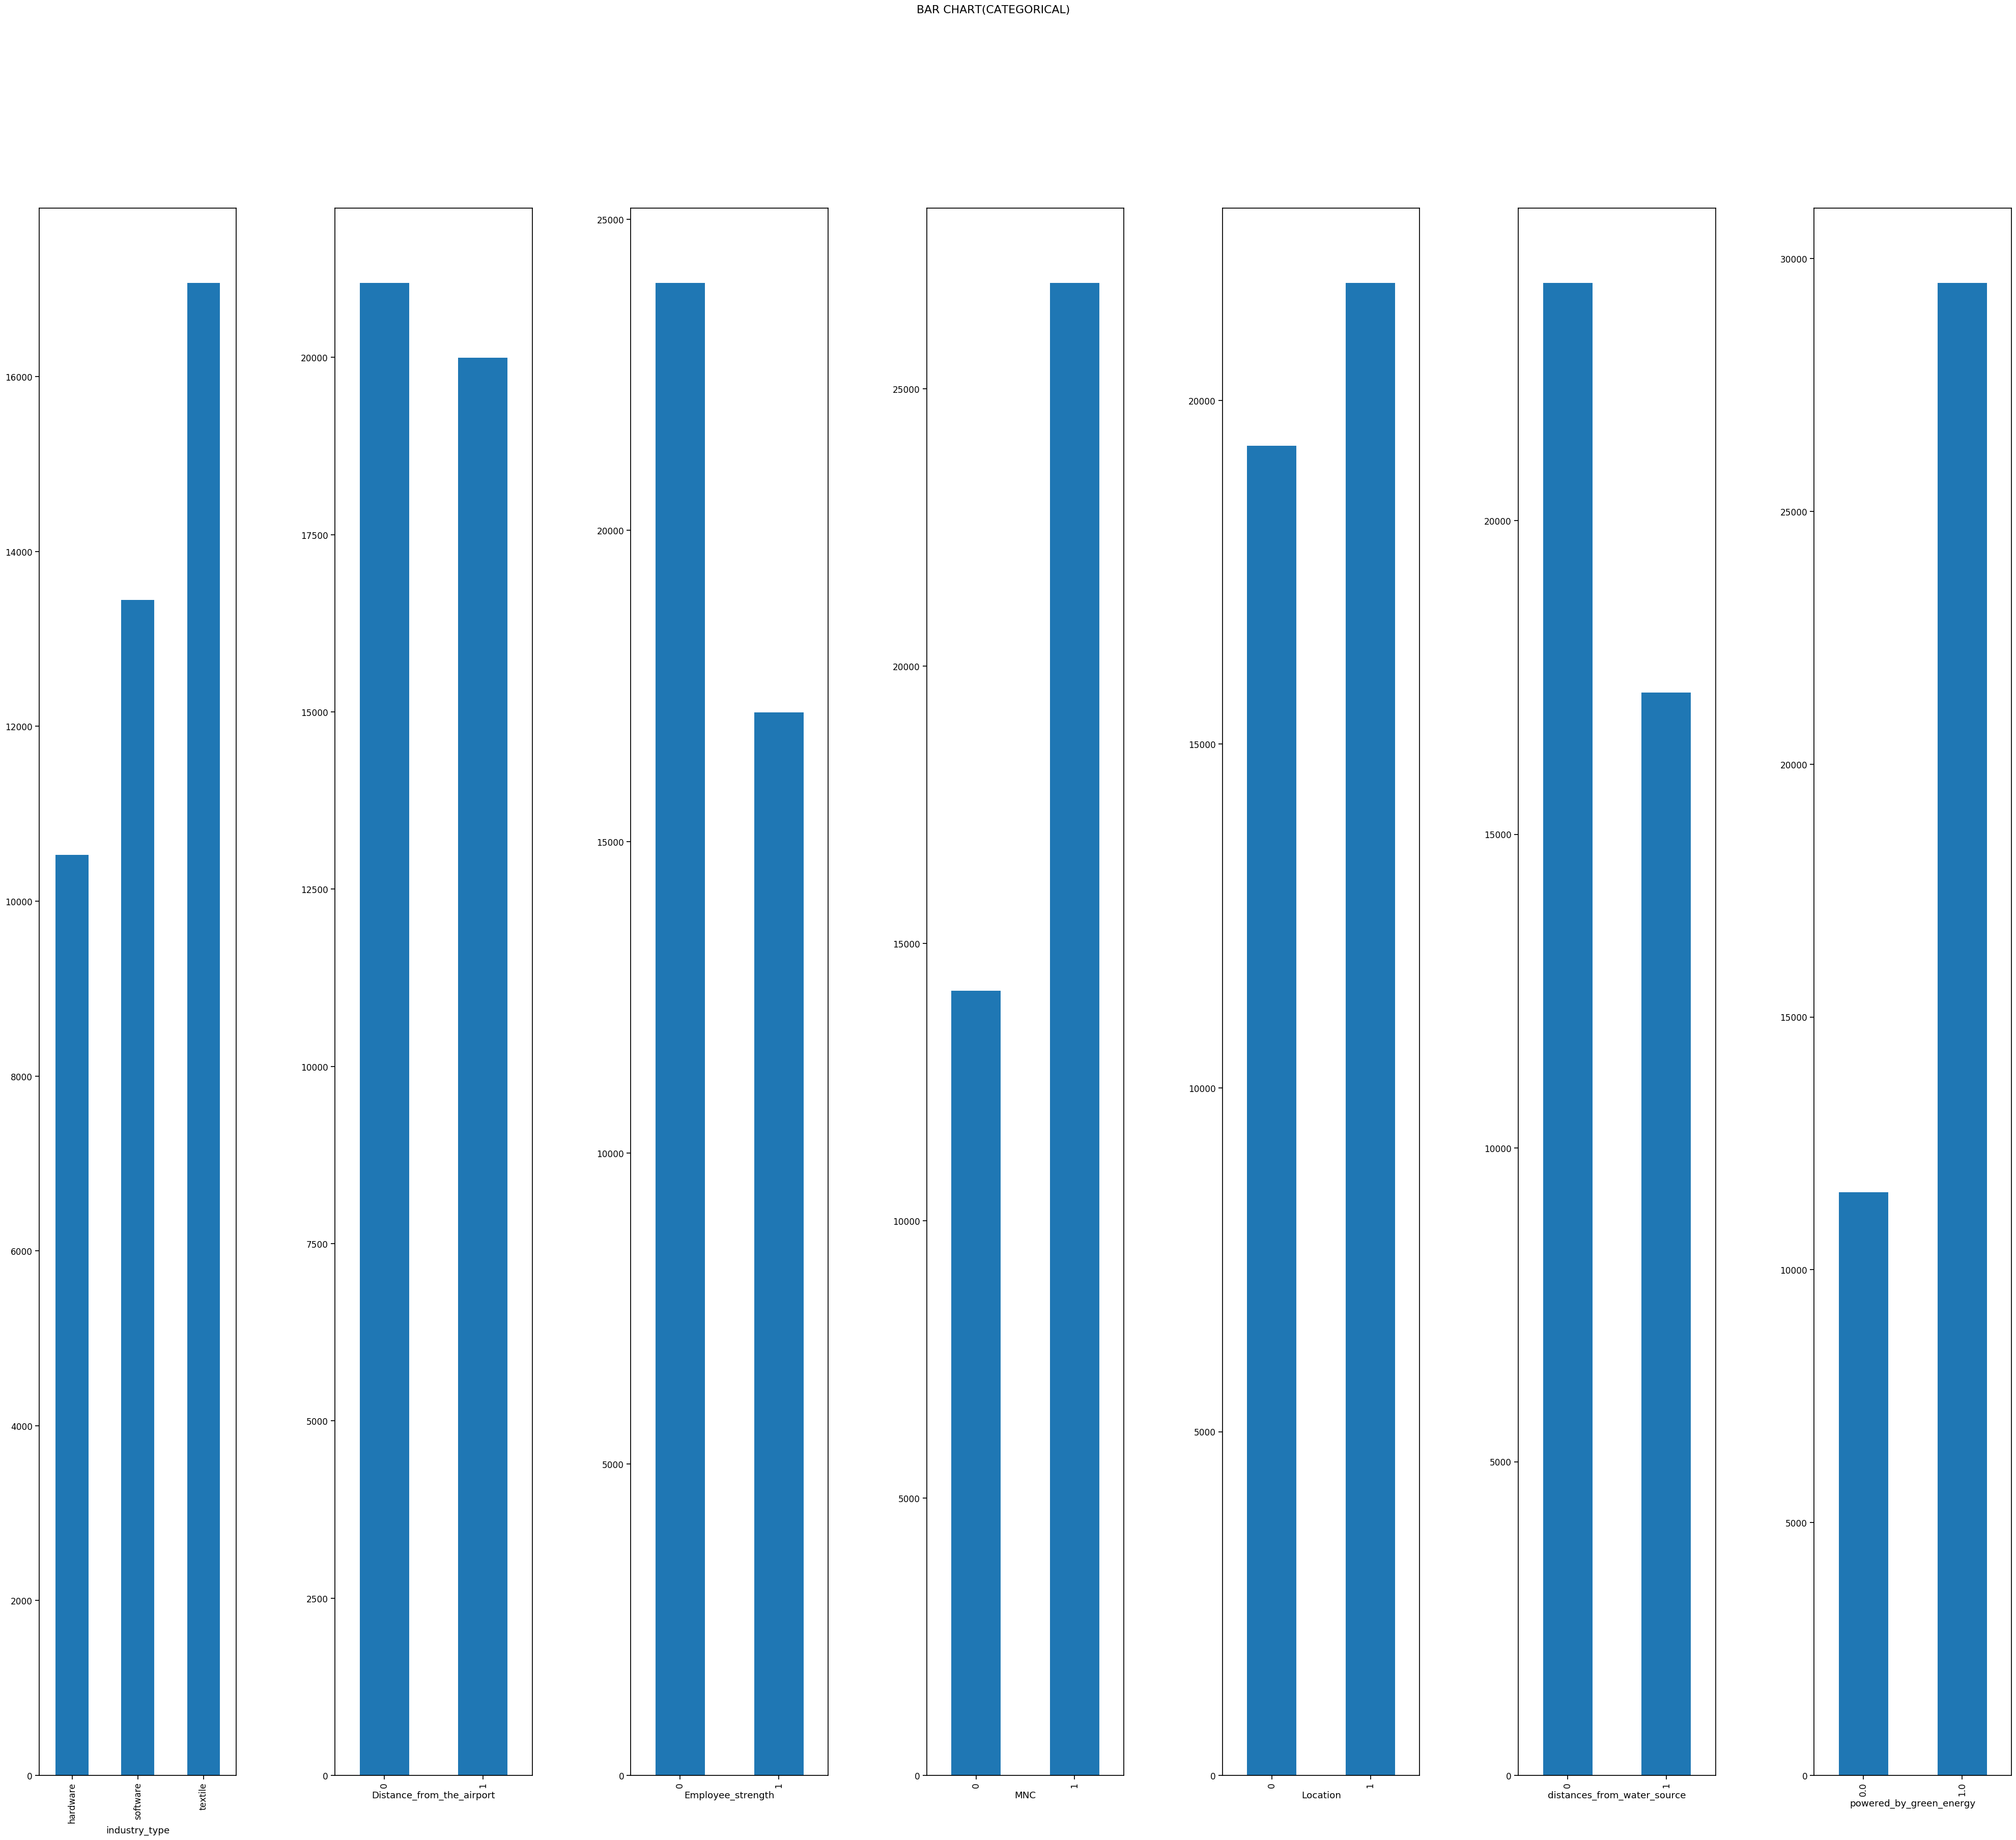

In [29]:
PlotBarCharts(inpData=df, colsToPlot=cat_cols)

/usr/share/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


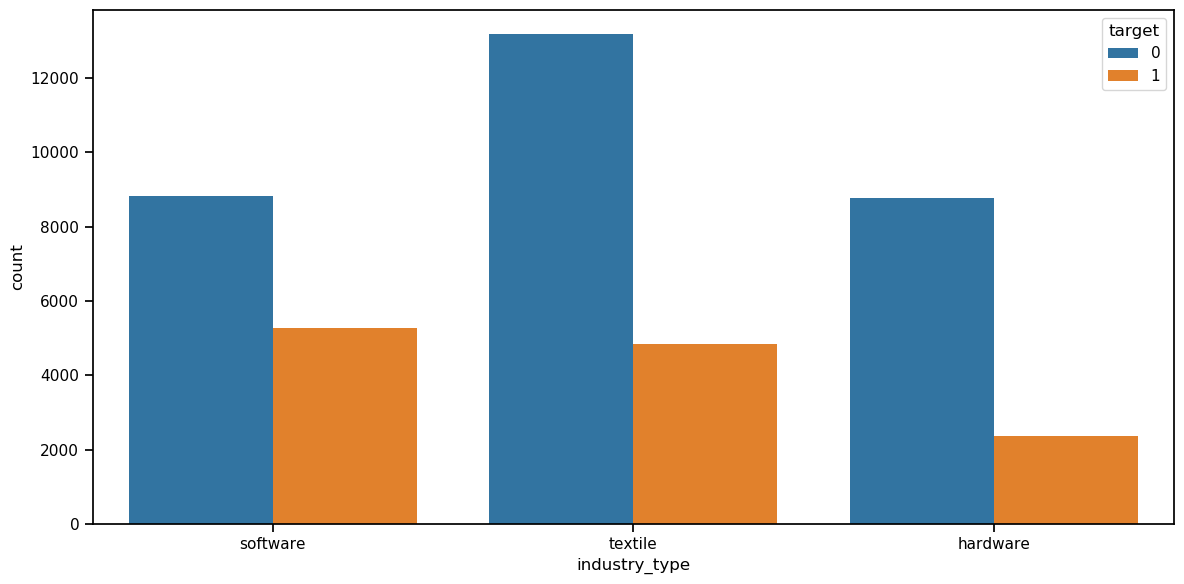

In [30]:
plt.figure(figsize=(12,6))
sns.set_context('notebook',font_scale = 1)
sns.countplot(data['industry_type'],hue=data["target"])
plt.tight_layout()

In [31]:
# df_drop = pd.DataFrame(df_drop)

# df_drop.to_csv(r'C:\Sameep\Professional Diploma in Data Science\Quarter - 4\Hands on Data Science Project - 2\export_dataframe.csv', header=True)
# print(df_drop)

Train Test Split

In [32]:
df['target'].value_counts()

0    28874
1    12177
Name: target, dtype: int64

In [33]:
df['target'].value_counts(normalize=True)*100

0    70.336898
1    29.663102
Name: target, dtype: float64

In [34]:
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

USING TRAIN TEST SPLIT ON DATA WITH NULL VALUES

In [35]:
#newdf['target'].value_counts()

In [36]:
#newdf['target'].value_counts(normalize=True)*100

In [37]:
#from sklearn.model_selection import  RandomizedSearchCV, train_test_split
#X = newdf.drop('target', axis=1)
#y = newdf.target

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
#X_train.isna().sum()

In [39]:
#X_test.isna().sum()

Imputation missing Categorical columns with Mode

In [40]:
#newdf_cat_train = X_train[cat_cols]
#newdf_cat_test = X_test[cat_cols]

In [41]:
#cat_imputer = SimpleImputer(strategy='most_frequent')

#cat_imputer.fit(newdf_cat_train)

In [42]:
#newdf_cat_train = pd.DataFrame(cat_imputer.transform(newdf_cat_train), columns=cat_cols)
#newdf_cat_test = pd.DataFrame(cat_imputer.transform(newdf_cat_test), columns=cat_cols)

In [43]:
#newdf_num_train = X_train[num_cols]
#newdf_num_test = X_test[num_cols]

Imputation missing Numerical columns with Median

In [44]:
#num_imputer = SimpleImputer(strategy='median')

#num_imputer.fit(newdf_num_train[num_cols])

In [45]:
#newdf_num_train = pd.DataFrame(num_imputer.transform(newdf_num_train), columns=num_cols)
#newdf_num_test =  pd.DataFrame(num_imputer.transform(newdf_num_test), columns=num_cols)

Combine imputed categorical and numeric columns

In [46]:
# Combine numeric and categorical in train
#X_train = pd.concat([newdf_num_train, newdf_cat_train], axis = 1)

# Combine numeric and categorical in test
#X_test = pd.concat([newdf_num_test, newdf_cat_test], axis = 1)

In [47]:
#X_train.isna().sum()

In [48]:
#X_test.isna().sum()

Converting Categorical to Numerical

In [49]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [50]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [51]:
pd.value_counts(y_train)/y_train.size * 100

0    70.502871
1    29.497129
dtype: float64

Standardization

In [52]:
num_att = X_train.select_dtypes(include=['float64', 'int64']).columns
num_att

Index(['total_liabilities/total_assets', 'working_capital/total_assets',
       'current_assets/short_term_liabilities',
       'retained_earnings/total_assets', 'sales/total_assets',
       'equity/total_assets', '(gross_profit + interest)/total_assets',
       '(total_liabilities * 365)/(gross_profit + depreciation)'],
      dtype='object')

In [53]:
scaler = StandardScaler()
scaler.fit(X_train[num_att])

StandardScaler()

In [54]:
X_train_std = scaler.transform(X_train[num_att])
X_test_std = scaler.transform(X_test[num_att])

One Hot Encoding

In [55]:
cat_att = X_train.select_dtypes(include=['category']).columns
cat_att

Index(['industry_type', 'Distance_from_the_airport', 'Employee_strength',
       'MNC', 'Location', 'distances_from_water_source',
       'powered_by_green_energy'],
      dtype='object')

In [56]:
encoding = OneHotEncoder(drop = 'first')

encoding.fit(X_train[cat_att])

OneHotEncoder(drop='first')

In [57]:
X_train_ohe =encoding.transform(X_train[cat_att]).toarray()
X_test_ohe =encoding.transform(X_test[cat_att]).toarray()

In [58]:
X_train_concatenate = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_concatenate = np.concatenate([X_test_std, X_test_ohe], axis=1)

Model Building

In [59]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_concatenate, y_train)
train_pred = logistic.predict(X_train_concatenate)
test_pred = logistic.predict(X_test_concatenate)
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accuracy : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))    
    print("F1 score: ",f1_score(act,pred))

print("Train")
evaluate_model(y_train, train_pred)
print("Test")
evaluate_model(y_test, test_pred)

Train
Confusion Matrix 
 [[20192    67]
 [ 3297  5179]]
Accuracy :  0.8829302244649382
Recall   :  0.6110193487494101
Precision:  0.9872283644681662
F1 score:  0.754846232327649
Test
Confusion Matrix 
 [[8585   30]
 [1352 2349]]
Accuracy :  0.8877882429360182
Recall   :  0.6346933261280735
Precision:  0.987389659520807
F1 score:  0.7726973684210526


A. SVM (Linear and RBF Models)
Create a SVC classifier using a linear kernel

In [60]:
linear_svm = SVC(kernel='linear', C=1)

In [61]:
linear_svm.fit(X=X_train_concatenate, y= y_train)

SVC(C=1, kernel='linear')

In [62]:
train_prediction = linear_svm.predict(X_train_concatenate)
test_prediction = linear_svm.predict(X_test_concatenate)

In [63]:
### Train data accuracy
evaluate_model(y_train, train_prediction)

### Test data accuracy
evaluate_model(y_test, test_prediction)

Confusion Matrix 
 [[20193    66]
 [ 3298  5178]]
Accuracy :  0.8829302244649382
Recall   :  0.6109013685700803
Precision:  0.9874141876430206
F1 score:  0.7548104956268221
Confusion Matrix 
 [[8586   29]
 [1353 2348]]
Accuracy :  0.8877882429360182
Recall   :  0.6344231288840854
Precision:  0.9877997475809844
F1 score:  0.7726225732148734


Non Linear SVM

In [64]:
svc = SVC(kernel='rbf', gamma=0.01, C=10)
svc

SVC(C=10, gamma=0.01)

In [65]:
svc.fit(X=X_train_concatenate, y=y_train)

SVC(C=10, gamma=0.01)

In [66]:
train_prediction_nls = svc.predict(X_train_concatenate)
test_prediction_nls = svc.predict(X_test_concatenate)

In [67]:
### Train data accuracy
evaluate_model(y_train, train_prediction_nls)

### Test data accuracy
evaluate_model(y_test, test_prediction_nls)

Confusion Matrix 
 [[20193    66]
 [ 3294  5182]]
Accuracy :  0.8830694275274056
Recall   :  0.6113732892873998
Precision:  0.9874237804878049
F1 score:  0.75517341882833
Confusion Matrix 
 [[8585   30]
 [1356 2345]]
Accuracy :  0.88746346216304
Recall   :  0.6336125371521211
Precision:  0.9873684210526316
F1 score:  0.7718894009216589


SVM with Grid Search for Paramater Tuning

In [68]:
svc_grid = SVC()
 
param_grid = { 
                'C': [0.001],# 0.01, 0.1, 1, 10, 100 ],
                'gamma': [0.0001], #0.001, 0.01, 0.1, 1, 10, 100], 
                'kernel':['linear', 'rbf', 'poly' ]
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid = param_grid, cv = 3)

In [69]:
%%time 
svc_cv_grid.fit(X=X_train_concatenate, y=y_train)

CPU times: user 2min 25s, sys: 79.9 ms, total: 2min 25s
Wall time: 2min 25s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001], 'gamma': [0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [70]:
svc_cv_grid.best_params_


{'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}

In [71]:
train_predictions_nlsh = svc_cv_grid.predict(X_train_concatenate)
test_predictions_nlsh = svc_cv_grid.predict(X_test_concatenate)

In [72]:
### Train data accuracy
evaluate_model(y_train, train_predictions_nlsh)

### Test data accuracy
evaluate_model(y_test, test_predictions_nlsh)

Confusion Matrix 
 [[20193    66]
 [ 3298  5178]]
Accuracy :  0.8829302244649382
Recall   :  0.6109013685700803
Precision:  0.9874141876430206
F1 score:  0.7548104956268221
Confusion Matrix 
 [[8586   29]
 [1353 2348]]
Accuracy :  0.8877882429360182
Recall   :  0.6344231288840854
Precision:  0.9877997475809844
F1 score:  0.7726225732148734


Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf_rf = RandomForestClassifier(n_estimators=10)

clf_rf.fit(X=X_train_concatenate, y=y_train)

y_pred_train = clf_rf.predict(X_train_concatenate)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test_concatenate)
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.9860448929876457
Test Accuracy: 0.8901429035401104


In [75]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

In [76]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [77]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9810    0.9996    0.9902     20259
           1     0.9989    0.9538    0.9758      8476

    accuracy                         0.9860     28735
   macro avg     0.9899    0.9767    0.9830     28735
weighted avg     0.9863    0.9860    0.9859     28735


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8817    0.9735    0.9254      8615
           1     0.9187    0.6960    0.7920      3701

    accuracy                         0.8901     12316
   macro avg     0.9002    0.8348    0.8587     12316
weighted avg     0.8928    0.8901    0.8853     12316



In [78]:
print(confusion_matrix(y_test, y_pred_test))

[[8387  228]
 [1125 2576]]


In [79]:
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

In [80]:
def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="weighted")
    train_precision= precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="weighted")
    test_precision= precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [81]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForest_BestParameters",scores)
scores

/tmp/ipykernel_3113/3396024192.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,RandomForest_BestParameters,0.986045,0.986045,0.986283,0.985949,0.890143,0.890143,0.892835,0.885287


In [82]:
param_grid = {"n_estimators" : [50, 100],
              "max_depth" : [1,5],
              "max_features" : [3, 5],
              "min_samples_leaf" : [1, 2, 4]}

In [83]:
clf3 = RandomForestClassifier()

In [84]:
clf_grid = GridSearchCV(clf3, param_grid, cv=2)

In [85]:
clf_grid.fit(X_train_concatenate, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5], 'max_features': [3, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [86]:
clf_grid.best_params_

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 50}

In [87]:
train_pred = clf_grid.predict(X_train_concatenate)
test_pred = clf_grid.predict(X_test_concatenate)

In [88]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[20184    75]
 [ 2973  5503]]
Accuracy :  0.8939272663998608
Recall   :  0.6492449268522889
Precision:  0.9865543205449983
F1 score:  0.7831222427778569
--Test--
Confusion Matrix 
 [[8579   36]
 [1220 2481]]
Accuracy :  0.8980188372848328
Recall   :  0.6703593623345042
Precision:  0.9856972586412396
F1 score:  0.7980057896429722


In [89]:
clf_rf.feature_importances_

array([0.04987314, 0.0497789 , 0.05036012, 0.04186046, 0.05596072,
       0.05075936, 0.05451705, 0.05485762, 0.009626  , 0.00388831,
       0.18746272, 0.0041042 , 0.23534491, 0.04808968, 0.09617444,
       0.00734238])

In [90]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)
print(indices)

[ 9 11 15  8  3 13  1  0  2  5  6  7  4 14 10 12]


In [91]:
print(len(indices))

16


In [92]:
# X_train = pd.DataFrame(X_train_concatenate, columns = X_train_concatenate.columns)

In [93]:
# %matplotlib inline
# features = X_train_concatenate.columns
# plt.figure(figsize=(10,6))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)),importances[indices], color='b',align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 0.00001)
# plt.xlabel('Relative Importance')

# plt.show()

AdaBoost Classifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost-decision tree classifer object
clf_adaboost =  AdaBoostClassifier(n_estimators = 100,
    learning_rate = 0.1)

clf_adaboost.fit(X_train_concatenate, y_train)

y_pred_train = clf_adaboost.predict(X_train_concatenate)
y_pred_test = clf_adaboost.predict(X_test_concatenate)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))


Train Accuracy: 0.8829302244649382
Test Accuracy: 0.8877882429360182


In [95]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8596    0.9967    0.9231     20259
           1     0.9874    0.6109    0.7548      8476

    accuracy                         0.8829     28735
   macro avg     0.9235    0.8038    0.8390     28735
weighted avg     0.8973    0.8829    0.8735     28735


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8639    0.9966    0.9255      8615
           1     0.9878    0.6344    0.7726      3701

    accuracy                         0.8878     12316
   macro avg     0.9258    0.8155    0.8491     12316
weighted avg     0.9011    0.8878    0.8796     12316



In [96]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost",scores)
scores

/tmp/ipykernel_3113/3396024192.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,RandomForest_BestParameters,0.986045,0.986045,0.986283,0.985949,0.890143,0.890143,0.892835,0.885287
1,Adaboost,0.882930,0.882930,0.897306,0.873465,0.887788,0.887788,0.901111,0.879570


In [97]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'n_estimators' : [400],#, 500, 600],
              'learning_rate' : [0.2]}#, 0.3, 0.4]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [98]:
%time Adaboost_model_clf.fit(X_train_concatenate, y_train)

CPU times: user 26.9 s, sys: 156 ms, total: 27.1 s
Wall time: 49.5 s


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.2], 'n_estimators': [400]})

In [99]:
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_) 

0.8817121976683489 {'learning_rate': 0.2, 'n_estimators': 400}


In [100]:
best_ada_model

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=400)

In [101]:
y_pred_train = best_ada_model.predict(X_train_concatenate)
y_pred_test = best_ada_model.predict(X_test_concatenate)

print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8914564120410648
Test Accuracy: 0.8878694381292628


In [102]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8749    0.9872    0.9277     20259
           1     0.9558    0.6627    0.7827      8476

    accuracy                         0.8915     28735
   macro avg     0.9153    0.8249    0.8552     28735
weighted avg     0.8988    0.8915    0.8849     28735


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8740    0.9812    0.9245      8615
           1     0.9387    0.6706    0.7823      3701

    accuracy                         0.8879     12316
   macro avg     0.9063    0.8259    0.8534     12316
weighted avg     0.8934    0.8879    0.8818     12316



In [103]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Adaboost_BestParameters",scores)
scores

/tmp/ipykernel_3113/3396024192.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,RandomForest_BestParameters,0.986045,0.986045,0.986283,0.985949,0.890143,0.890143,0.892835,0.885287
1,Adaboost,0.882930,0.882930,0.897306,0.873465,0.887788,0.887788,0.901111,0.879570
2,Adaboost_BestParameters,0.891456,0.891456,0.898768,0.884900,0.887869,0.887869,0.893428,0.881770


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.1,
                                       subsample=0.8)

In [106]:
%time GBM_model.fit(X=X_train_concatenate, y=y_train)

CPU times: user 3.4 s, sys: 0 ns, total: 3.4 s
Wall time: 3.4 s


GradientBoostingClassifier(n_estimators=50, subsample=0.8)

In [107]:
y_pred_train = GBM_model.predict(X_train_concatenate)
y_pred_test = GBM_model.predict(X_test_concatenate)
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.8930572472594397
Test Accuracy: 0.8976940565118545


In [108]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8708    0.9961    0.9292     20259
           1     0.9856    0.6469    0.7811      8476

    accuracy                         0.8931     28735
   macro avg     0.9282    0.8215    0.8552     28735
weighted avg     0.9047    0.8931    0.8855     28735


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8751    0.9959    0.9316      8615
           1     0.9861    0.6690    0.7972      3701

    accuracy                         0.8977     12316
   macro avg     0.9306    0.8325    0.8644     12316
weighted avg     0.9084    0.8977    0.8912     12316



In [109]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)
scores

/tmp/ipykernel_3113/3396024192.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,RandomForest_BestParameters,0.986045,0.986045,0.986283,0.985949,0.890143,0.890143,0.892835,0.885287
1,Adaboost,0.882930,0.882930,0.897306,0.873465,0.887788,0.887788,0.901111,0.879570
2,Adaboost_BestParameters,0.891456,0.891456,0.898768,0.884900,0.887869,0.887869,0.893428,0.881770
3,GBM,0.893057,0.893057,0.904693,0.885549,0.897694,0.897694,0.908419,0.891200


In [110]:
# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [50],#
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.2]}#0.3
 
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv=5)

In [111]:
%time CV_GBM.fit(X=X_train_std, y=y_train)

CPU times: user 2min 30s, sys: 0 ns, total: 2min 30s
Wall time: 2min 30s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 10],
                         'n_estimators': [50]})

In [112]:
# Find best model
best_gbm_model = CV_GBM.best_estimator_
print (CV_GBM.best_score_, CV_GBM.best_params_)

0.7042630937880633 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [113]:
y_pred_train=best_gbm_model.predict(X_train_std)
y_pred_test=best_gbm_model.predict(X_test_std)

In [114]:
print("Train Accuracy:",accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

Train Accuracy: 0.7099356185836089
Test Accuracy: 0.6999025657681065


In [115]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.7087    0.9994    0.8293     20259
           1     0.9273    0.0181    0.0354      8476

    accuracy                         0.7099     28735
   macro avg     0.8180    0.5087    0.4324     28735
weighted avg     0.7732    0.7099    0.5951     28735


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.7005    0.9976    0.8230      8615
           1     0.5532    0.0070    0.0139      3701

    accuracy                         0.6999     12316
   macro avg     0.6268    0.5023    0.4184     12316
weighted avg     0.6562    0.6999    0.5799     12316



In [116]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM_BestParameters",scores)
scores

/tmp/ipykernel_3113/3396024192.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,RandomForest_BestParameters,0.986045,0.986045,0.986283,0.985949,0.890143,0.890143,0.892835,0.885287
1,Adaboost,0.882930,0.882930,0.897306,0.873465,0.887788,0.887788,0.901111,0.879570
2,Adaboost_BestParameters,0.891456,0.891456,0.898768,0.884900,0.887869,0.887869,0.893428,0.881770
3,GBM,0.893057,0.893057,0.904693,0.885549,0.897694,0.897694,0.908419,0.891200
4,GBM_BestParameters,0.709936,0.709936,0.773159,0.595128,0.699903,0.699903,0.656209,0.579871


In [117]:
best_gbm_model.feature_importances_

array([0.06610791, 0.09809664, 0.12404421, 0.17804275, 0.12199741,
       0.06500138, 0.25612068, 0.09058903])

In [118]:
importances = best_gbm_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[5 0 7 1 4 2 3 6]
